# Миронова Елена, РИМ-181226
# 3. Коррекция яркости и цвета
## 3.1. Линейная коррекция цвета
### 3.1.1. Автоконтраст черно-белого изображения
Прочитайте изображение из файла img.png. Примените к нему линейное выравнивание яркости: примените к каждому пикселю функцию
$f(x) = (x - x_{min}) \cdot \frac{255}{x_{max} - x_{min}}$
После вычисления функции значения изображения окажутся вещественными. Чтобы привести их к целым числам, используйте метод 
`img.astype('uint8')`, который возвращает изображение в целых числах. 

In [1]:
from skimage.io import imread, imshow, imsave
from skimage import img_as_float, img_as_ubyte
from skimage.color import rgb2gray
import numpy as np
from numpy import clip, dstack, average
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\elenamir\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\Users\elenamir\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


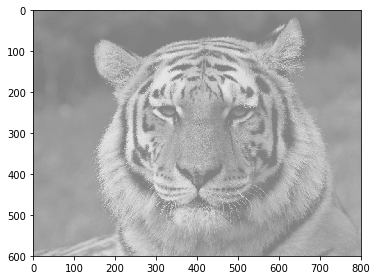

In [2]:
img = imread("https://stepik.org/media/attachments/lesson/58402/tiger-low-contrast.png")
img2 = imread("https://stepik.org/media/attachments/lesson/58402/tiger-high-contrast.png")
imshow(img)

In [3]:
def autocontrast(img):
    Xmin = min(img.ravel())
    Xmax = max(img.ravel())
    k = 255/(Xmax-Xmin)
    img = ((img-Xmin)*k).astype('uint8')
    return img

C:\Users\elenamir\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\Users\elenamir\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


True

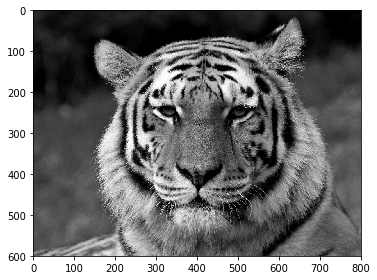

In [4]:
img = autocontrast(img)
imshow(img)
np.array_equal(img, img2)

In [5]:
imsave('out1.png', img)

### 3.1.2. Подсчет минимума и максимума устойчивого автоконтраста

Прочитайте изображение из файла img.png. Подсчитайте минимум и максимум яркости для стабильного автоконтраста этого изображения. Необходимо отбросить 5% самых светлых и 5% самых темных пикселей. Для получения числа отбрасываемых пикселей используйте формулу
`𝑘=𝑟𝑜𝑢𝑛𝑑(#𝑝𝑖𝑥⋅0.05)`
Два посчитанных числа (минимум и максимум) выведите на стандартный вывод через пробел.

In [6]:
def top_lightest_darkest(img):
    imgs = np.sort(img.ravel())
    trash = int(imgs.shape[0] *0.05)
    imgs = imgs[trash: imgs.shape[0]-trash]
    lightest = imgs[0]
    darkest = imgs[imgs.shape[0]-1]
    return lightest, darkest

In [7]:
img = imread("https://stepik.org/media/attachments/lesson/58402/tiger-low-contrast.png")
top_lightest_darkest(img)

(129, 208)

### 3.1.3. Устойчивый автоконтраст черно-белого изображения

Прочитайте изображение из файла img.png. Примените к нему линейное выравнивание яркости: примените к каждому пикселю функцию
$f(x) = (x - x_{min}) \cdot \frac{255}{x_{max} - x_{min}}$
Для вычисления максимума и минимума отбрасывайте по 5% самых светлых и самых темных пикселей (как в предыдущем задании). Перед вычислениями приведите изображение в вещественные числа `(img.astype('float'))`, иначе может возникнуть переполнение (т.к. значения некоторых пикселей мы игнорируем при подсчете минимума и максимума). После растяжения яркости обрежьте значения изображения от 0 до 255 с помощью функции `numpy.clip`.

После вычисления функции значения изображения окажутся вещественными. Чтобы привести их к целым числам, используйте метод `img.astype('uint8')`, который возвращает изображение в целых числах.

In [8]:
img = imread("https://stepik.org/media/attachments/lesson/58402/tiger-low-contrast.png")
img2 = imread("https://stepik.org/media/attachments/lesson/58402/tiger-stable-contrast.png")

In [9]:
def st_acont_bw(img):
    lighest, darkest = top_lightest_darkest(img)
    img = img.astype('float')

    img = (img - lighest) * 255/(darkest - lighest)
    img = np.clip(img, 0, 255)
    img = img.astype('uint8')
    return img

C:\Users\elenamir\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\Users\elenamir\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


True

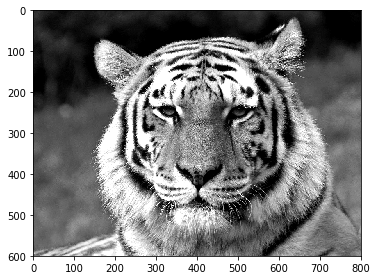

In [10]:
img = st_acont_bw(img)

imshow(img)
np.array_equal(img, img2)

## 3.2. Коррекция контраста цветного изображения
Устойчивый цветной автоконтраст

Прочитайте цветное изображение из файла `img.png`. Примените к нему устойчивый автоконтраст. Для этого:
1. Переведите изображение в вещественные числа от 0 до 1.
2. Переведите изображение в пространство YUV по формулам:

$Y = 0.2126⋅R+0.7152⋅G+0.0722⋅B$

$U = −0.0999⋅R−0.3360⋅G+0.4360⋅B$

$V = 0.6150⋅R−0.5586⋅G−0.0563⋅B$

3. Найдите максимум и минимум для устойчивого автоконтраста с отбрасыванием 5% самых светлых и 5% самых темных пикселей.
4. Примените линейное растяжение канала Y по формуле
$f(x) = (x - x_{min}) \cdot \frac{255}{x_{max} - x_{min}}$

5. Обрежьте значения канала Y от 0 до 1.
6. Переведите изображение в пространство RGB по формулам:

$R=Y+1.2803⋅V$

$G=Y−0.2148⋅U−0.3805⋅V$

$B=Y+2.1279⋅U$
7. Обрежьте значения изображения от 0 до 1.
8. Переведите изображение в целые числа от 0 до 255.

In [11]:
img = imread("https://stepik.org/media/attachments/lesson/60609/tiger-color.png")
img2 = imread("https://stepik.org/media/attachments/lesson/60609/tiger-stable-contrast.png")

In [12]:
def st_acont_c(img):
    #перевод изображения в вещественные числа от 0 до 1
    img_f = img_as_float(img)
    #Перевод изображения в пространство YUV
    R = img_f[:,:,0]
    G = img_f[:,:,1]
    B = img_f[:,:,2]
    Y =  0.2126* R + 0.7152* G + 0.0722* B
    U = -0.0999* R - 0.3360* G + 0.4360* B
    V =  0.6150* R - 0.5586* G - 0.0563* B
    left, right = top_lightest_darkest(Y)
    #Линейное растяжение канала Y и обрезка значения канала Y от 0 до 1
    Y = np.clip((Y - left)/(right - left), 0 , 1)
    # Перевод изображения в пространство RGB и обрезка значений изображения от 0 до 1
    R = np.clip(Y + 1.2803*V, 0 , 1)
    G = np.clip(Y - 0.2148*U - 0.3805*V, 0 , 1)
    B = np.clip(Y + 2.1279*U, 0 , 1)
    # Перевод изображения в целые числа от 0 до 255
    img = img_as_ubyte(np.dstack((R , G, B)))
    return img

C:\Users\elenamir\Anaconda3\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\elenamir\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\Users\elenamir\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


True

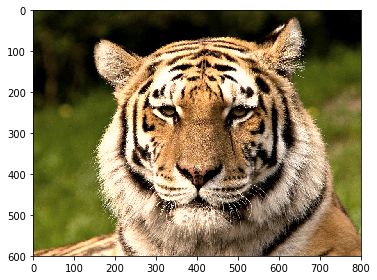

In [13]:
img = st_acont_c(img)
imshow(img)
np.array_equal(img, img2)

In [14]:
imsave('out2.png',img)

## 3.3. Баланс белого. Модель «серого мира»
### 3.3.1. Преобразование серого мира

Прочитайте изображение из файла `img.png`. Примените к нему преобразование серого мира. Для этого:
1. Сконвертируйте изображение в вещественные числа.
2. Подсчитайте коэффициенты `𝑟𝑤,𝑔𝑤,𝑏𝑤` как описано в видео.
3. Поделите каналы изображения на коэффициенты.
4. Обрежьте значения пикселей, чтобы они не выходили из допустимого диапазона `([0; 255] или [0;1])`.

In [15]:
img = imread("https://stepik.org/media/attachments/lesson/60610/railroad.png")
img2 = imread("https://stepik.org/media/attachments/lesson/60610/railroad-gray-world.png")

In [16]:
def bal_white(img):

    #Конвертация изображения в вещественные числа
    img = img_as_float(img)

    R = img[:,:, 0]
    G = img[:,:, 1]
    B = img[:,:, 2]

    #Вычисление коэффициентов rw, gw, bw
    #avg = (R.mean() + G.mean() + B.mean())/3
    avg = (R.mean() + G.mean() + B.mean())/3
    rw = R.mean()/avg
    gw = G.mean()/avg
    bw = B.mean()/avg

    #Деление каналов изображения на коэффициенты и обрезка значения пикселей в диапазоне от 0 до 1
    R = np.clip(R/rw, 0, 1)
    G = np.clip(G/gw, 0, 1)
    B = np.clip(B/bw, 0, 1)

    img = img_as_ubyte(np.dstack((R , G, B)))
    
    return img

In [17]:
img = bal_white(img)
np.array_equal(img, img2)

C:\Users\elenamir\Anaconda3\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


True

C:\Users\elenamir\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\Users\elenamir\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


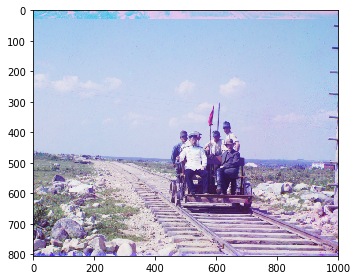

In [18]:
#как было до
img1 = imread("https://stepik.org/media/attachments/lesson/60610/railroad.png")
imshow(img1)

C:\Users\elenamir\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\Users\elenamir\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


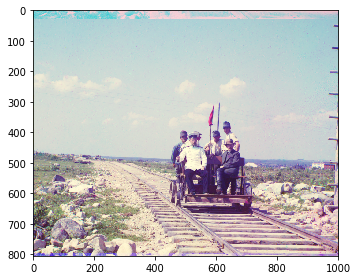

In [19]:
#как стало после
imshow(img)

## 3.4. Выравнивание гистограммы
### 3.4.1. Выравнивание гистограммы
Прочитайте изображение из файла img.png. Примените к нему выравнивание гистограммы по алгоритму, описанному в слайдах и видео. Работать достаточно в целых числах, помещающихся в байт (т.е. изображение конвертировать не нужно). 

In [20]:
img = imread('https://stepik.org/media/attachments/lesson/60611/landscape.png')
img2 = imread('https://stepik.org/media/attachments/lesson/60611/landscape-histeq.png')

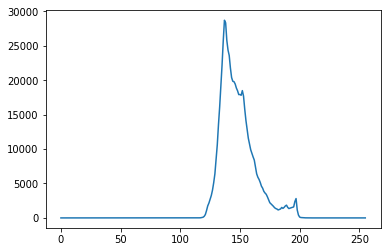

In [21]:
hist = np.zeros(256,np.int32)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        value=img[i][j]
        hist[value]+=1
plt.plot(hist) #гистограмма исходного изображения

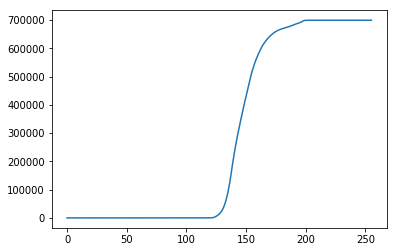

In [22]:
cdf=np.zeros(256,np.int32)
for i in range (256):
    cdf[i]=sum(hist[0:i])
plt.plot(cdf)# функция распределения исх.изображения

In [23]:
img_hist = np.zeros((img.shape[0], img.shape[1]))
cdf_min = min(cdf>0)

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        x=img[i][j]
        img_hist[i][j]=round((cdf[x]-cdf_min)/(img.shape[0]*img.shape[1]-1)*255) # формула для изменения контраста

C:\Users\elenamir\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\Users\elenamir\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


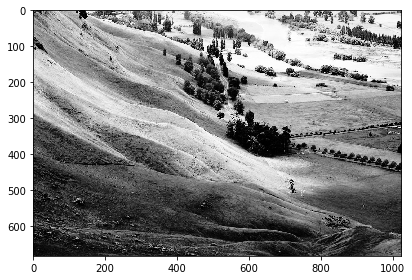

In [24]:
img_hist = clip(img_hist, 0, 255)
img_hist = img_hist.astype('uint8')
imshow(img_hist)

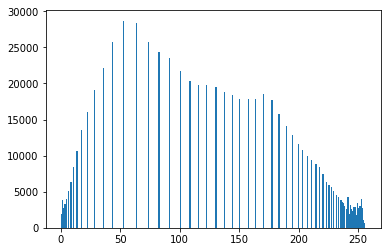

In [25]:
#теперь гистограмма линейно возрастает
plt.hist(img_hist.ravel(), bins=range(257))
plt.show()